# Исследование архива объявлений о продаже квартир в Санкт-Петербурге

## Введение

**Цель:** определить рыночную стоимость объектов недвижимости квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Задача:** установить параметры для построения автоматизированной системы, которая отследит аномалии и мошенническую деятельность.

**Данные** - архив объявлений о продаже в Санкт-Петербурге и соседних населённых пунктах за несколько лет по данным сервиса Яндекс.Недвижимость. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных - расстояние до центра, аэропорта, ближайшего парка и водоёма.

- locality_name - название населённого пункта
- rooms - число комнат
- studio - квартира-студия (булев тип)
- is_apartment - апартаменты (булев тип)
- open_plan - свободная планировка (булев тип)
- last_price - цена на момент снятия с публикации
- total_area - площадь квартиры в квадратных метрах (м²)
- kitchen_area - площадь кухни в квадратных метрах (м²)
- living_area - жилая площадь в квадратных метрах(м²)
- floor - этаж
- floors_total - всего этажей в доме
- ceiling_height - высота потолков (м)
- balcony - число балконов
- first_day_exposition - дата публикации
- days_exposition - сколько дней было размещено объявление (от публикации до снятия)
- airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest - расстояние до центра города (м)
- parks_around3000 - число парков в радиусе 3 км
- parks_nearest - расстояние до ближайшего парка (м)
- ponds_around3000 - число водоёмов в радиусе 3 км
- ponds_nearest - расстояние до ближайшего водоёма (м)
- total_images - число фотографий квартиры в объявлении

## План исследования:

1. Изучить общую информацию о данных.
2. Произвести предобработку данных:
   - Определить и изучить пропущенные значения, по возможности произвести их замену. Определить причины, которые могли привести к пропускам в данных.
   - Привести данные к нужным типам и объяснить необходимость этих изменений.
3. Посчитать и добавить в таблицу:
   - цену квадратного метра;
   - день недели, месяц и год публикации объявления;
   - этаж квартиры; варианты - первый, последний, другой;
   - соотношение жилой и общей площади;
   - отношение площади кухни к общей.
4. Провести исследовательский анализ данных:
   - Изучить параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
   - Изучить время продажи квартиры. Построить гистограмму, посчитать среднее и медиану. Описать, сколько обычно занимает продажа и когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
   - Убрать редкие и выбивающиеся значения. Описать обнаруженные особенности.
   - Определить какие факторы больше всего влияют на стоимость квартиры?
      - Изучить, зависит ли цена от площади, числа комнат, удалённости от центра.
      - Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
      - Изучить зависимость от даты размещения: дня недели, месяца и года.
5. Выбрать 10 населённых пунктов (locality_name) с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.
6. Изучить предложения квартир:
   - Выделить квартиры в Санкт-Петербурге (locality_name), выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах: округлить до целых значений, посчитать среднюю цену для каждого километра.
   - Построить график, который показывает, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется — это и будет центральная зона.
   - Выделить сегмент квартир в центре. Проанализировать эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).
   - Определить отличаются ли параметры квартир в центре от остального города.
7. Сформулировать выводы.

## Импорт библиотек Python

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## Импорт данных

Открываем файл с использованием разделителя, запрашиваем общую информацию о датафрейме и строим гистограммы для всех числовых столбцов:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

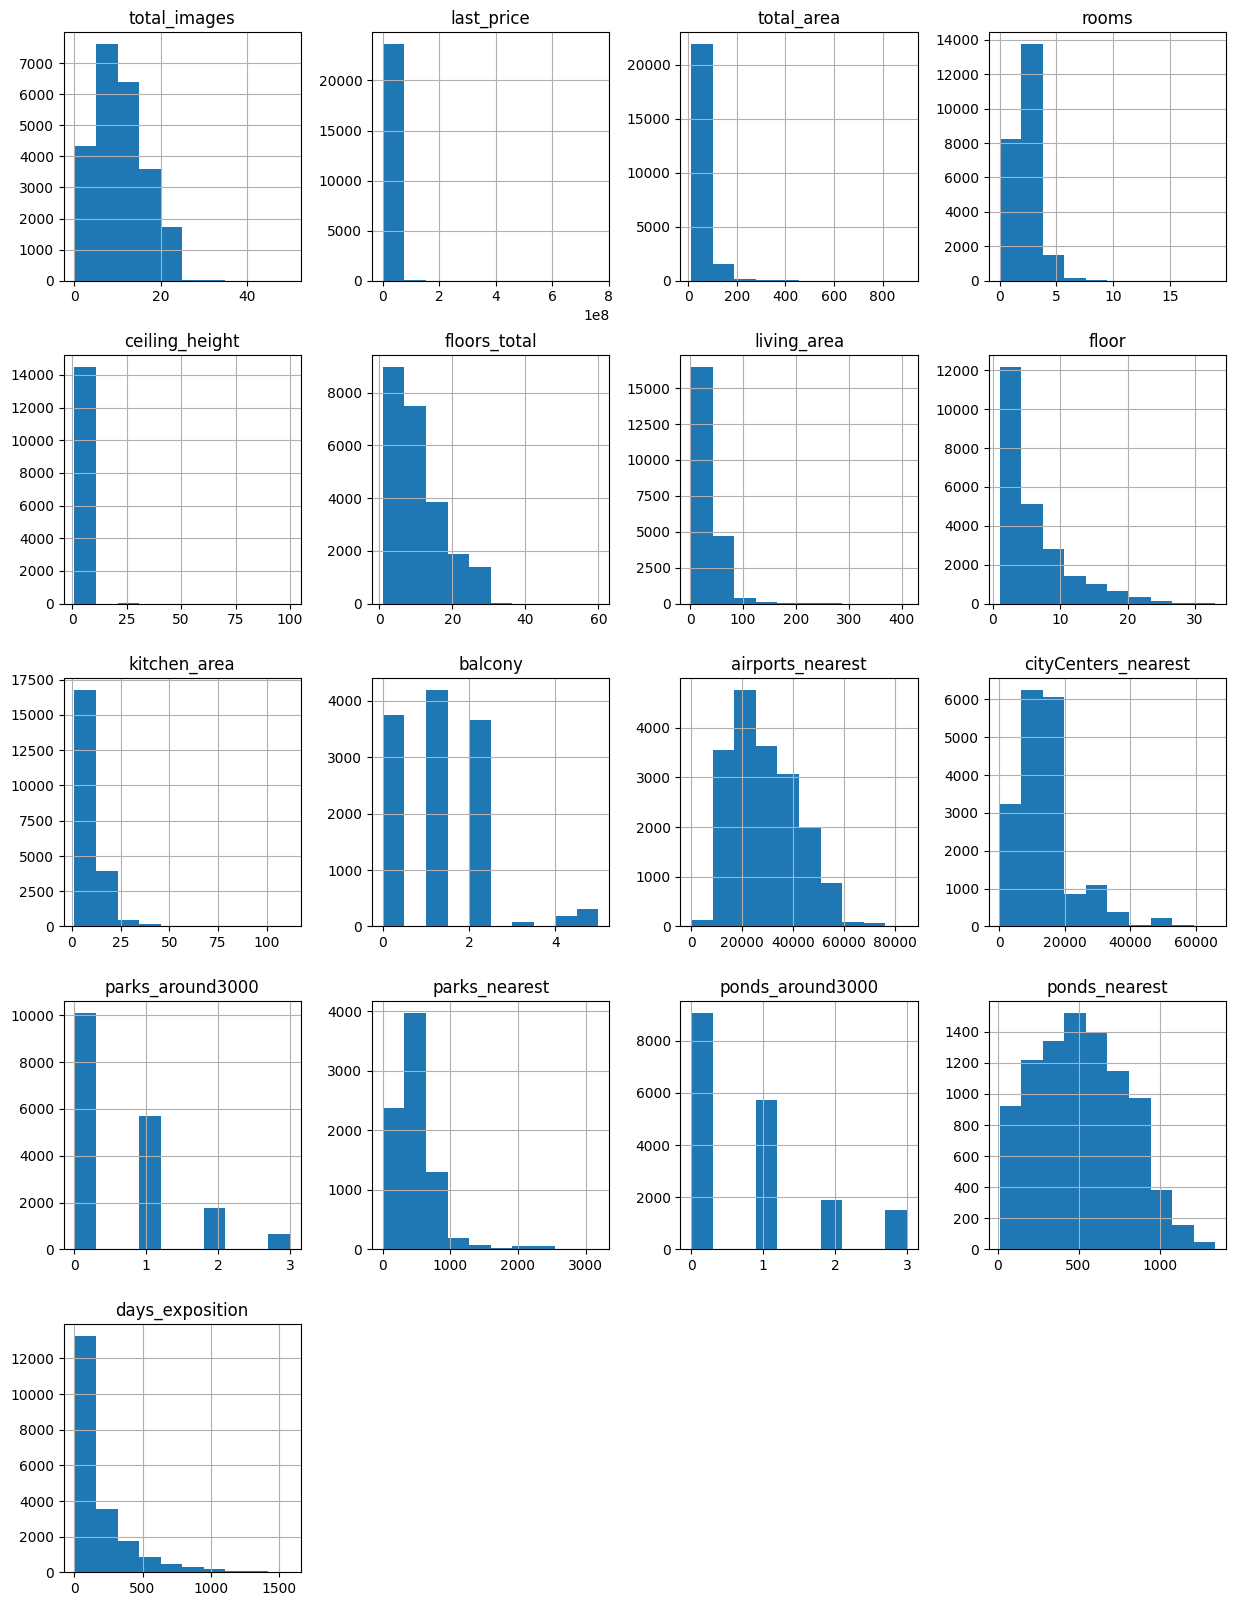

In [36]:
data = pd.read_csv('C:\\Users\\77281\\Downloads\\real_estate_data.csv', sep='\t') 
data.head(30)
data.info()  
data.hist(figsize=(15,20));  

Получаем больше информации о датафрейме:

In [37]:
data.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Таблица **data**, импортированная из файла **real_estate_data.csv**, состоит из 22 столбцов и содержит 23699 строки. В наборе данных присутствуют пропущенные значения, артефакты и аномалии, которые требуют корректировки.

## Предобработка данных

### Работа с пропусками


Определяем столбцы с пропущенными данными:

In [38]:
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [39]:
data.head(10) #просматриваем общий вид датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Найдены пропуски в столбцах 'ceiling_height','floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name',  'airports_nearest', 'cityCenters_nearest',  'parks_around3000', 'parks_nearest', 'ponds_around3000', 'days_exposition'.

Причины для пропусков в столбцах  'ceiling_height' и 'floors_total' не выявлены, возможно продавцы невнимательно заполняли объявление о продаже. 

Пропуски в столбце 'is_apartmen' скорее всего говорят о том, что тип жилья - 'квартира'. Тип жилья - 'квартира' большинством считается по умолчанию, если не указано другое. Так что логично будет для этого столбца заменить значения NAN на False.

Пропуски в столбцах 'living_area' и 'kitchen_area' скорее всего связаны с типом жилья. Для аппартаментов и квартир со свободными планировками не выделяют отдельно жилую площадь и площадь кухни, указывается только общая площадь. Эти столбцы надо изучить подробнее (см. ниже).

Пропуски в столбце 'balcony' вероятнее всего подразумевают отсутствие балкона. Поэтому заменяем значения NAN на '0'.

При изучении столбцов с геоданными 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest' видим, что объекты расположены в загородных поселках, где указанных объектов нет поблизости. То есть пропуск - это отсутствие аэропорта, центра города, парка или пруда. Поэтому оставляем пропуски без изменения.

Для столбцов 'parks_around3000' и 'ponds_around3000' с количеством парков и прудов в зоне радиуса 3 км пропуск указывает на их отсутствие. Поэтому вместо пропуска можем поставить '0'.

Пропуски в столбце days_exposition встречаются в свежих объявлениях (смотрим по данным в столбце 'first_day_exposition') и вероятно означают, что объявление еще не снято с продажи. Имеет смысл оставить пропуски как есть.


Изучим подробнее столбцы 'living_area' и 'kitchen_area' на предмет возможной причины появления пропусков:

In [40]:
data.loc[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,False,False,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [41]:
data.loc[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13.0,NaN,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.6,10,False,False,False,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


К сожалению, наше предположение, что предложения с пропусками в столбцах 'living_area' и 'kitchen_area' являются аппартаментами или квартирами свободной планировки, не подтвердилось. Строки с пропусками в этих столбцах не являются ни студиями, ни аппартаментами, ни свободной планировкой. Вероятно проблема связана с некачественной выгрузкой данных. Рекомендуется задать этот вопрос коллегам.
Строк с пропусками слишком много, чтобы удалить их без существенного ухудшения качества данных. Поэтому оставляем пропуски без изменений.

Заполняем пропуски в столбце 'is_apartment':

In [42]:
data.loc[data['is_apartment'] != True, 'is_apartment'] = False 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заполняем пропуски в столбце 'balcony':

In [43]:
data['balcony'] = data['balcony'].fillna(0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заполняем пропуски в столбце 'parks_around3000' и 'ponds_around3000':

In [44]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Работа с типами данных

В полученной методом .info() информации для нашего датафрейма видим, что в трех столбцах данные представлены в формате object. Чтобы избежать ошибок в дальнейших вычислениях, поменяем форматы:
- для столбца 'first_day_exposition' изменим тип 'object' на 'datetime64'
- для столбца 'is_apartment' тип 'object' изменим на тип 'bool'
- для столбца 'locality_name' оставим без изменения

Так же нужно поменять формат Float на формат Int64 для столбцов с целочисленными значениями: 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition'.

In [45]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [46]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [47]:
data['floors_total'] = data['floors_total'].astype('Int64')

In [48]:
data['balcony'] = data['balcony'].astype('Int64')

In [49]:
data['parks_around3000'] = data['parks_around3000'].astype('Int64')

In [50]:
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')

In [51]:
data['days_exposition'] = data['days_exposition'].round().astype('Int64')

In [52]:
data.info() #проверяем выполнение кода

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Изучаем дубликаты

In [53]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В названиях встречается много неявных дубликатов типа 'поселок' и 'посёлок', 'посёлок городского типа' и 'поселок городского типа' и т.п. Для чистоты данных лучше удалить все типы населенных пунктов, оставив только сами названия:

In [54]:
data['locality_name'] = data['locality_name'].replace('посёлок|городской посёлок|городской поселок|деревня|посёлок городского типа|поселок|поселок городского типа|садовое товарищество|село|поселок станции|посёлок станции|садоводческое некоммерческое товарищество|посёлок при железнодорожной станции|коттеджный поселок|городского типа|при железнодорожной станции|коттеджный', '', regex=True)
data['locality_name'].unique()

array(['Санкт-Петербург', ' Шушары', ' Янино-1', ' Парголово', ' Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', ' Кудрово',
       'Коммунар', 'Колпино', '  Красный Бор', 'Гатчина', ' Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', ' Новое Девяткино',
       ' Металлострой', '  Лебяжье', '  Сиверский', ' Молодцово',
       '  Кузьмоловский', ' Новая Ропша', 'Павловск', ' Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       ' Куттузи', ' Аннино', '  Ефимовский', ' Плодовое', ' Заклинье',
       ' Торковичи', ' Первомайское', 'Красное Село', ' Понтонный',
       'Сясьстрой', ' Старая', ' Лесколово', ' Новый Свет', 'Сланцы',
       ' Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', ' Оржицы', ' Кальтино', 'Кудрово',
       ' Романовка', ' Бугры', '  Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', ' Павлово', ' Оредеж', ' Копорье', ' Молодёжное',
       'Тихвин', ' По

Удаляем явные дубликаты:

In [55]:
data = data.drop_duplicates().reset_index(drop=True) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

После удаления дубликатов количество строк в датафрейме не изменилось, значит прямых дубликатов не было.

### Работа с аномалиями

In [56]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Обращают на себя внимание странные значения в столбцах 'ceiling_height'. Необходимо изучить их подробнее.

In [57]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Получаем список аномальных значений:
14
27.5
nan
32
27.
26.
1.2
1.75
22.6
10.3
8.3
1.
24.
100.
25.
8.
20.
Значения 27.5, 32, 27., 26., 22.6, 24., 25. можно интерпретировать как ошибку в единицах измерения и перезаписать их как 2.75, 3.2, 2.7, 2.6, 2.26, 2.4, 2.5 .
Значения 14, 1.2, 1.75, 10.3, 8.3, 1., 100., 8., 20. интерпретируем как аномалию. Заменяем их средним значением для выбранного интервала.
Значение nan также заполняем полученным после отброса аномалий средним значением.

In [58]:
data.loc[data['ceiling_height'] == '27.5','ceiling_height'] = '2.75'
data.loc[data['ceiling_height']=='32','ceiling_height'] = '3.2'
data.loc[data['ceiling_height']=='27.  ','ceiling_height'] = '2.7'
data.loc[data['ceiling_height']=='26.  ','ceiling_height'] = '2.6'
data.loc[data['ceiling_height']=='22.6','ceiling_height'] = '2.26'
data.loc[data['ceiling_height']=='24.','ceiling_height'] = '2.4'
data.loc[data['ceiling_height']=='25.','ceiling_height'] = '2.5'
data.loc[data['ceiling_height']=='25.0','ceiling_height'] = '2.5'
data.loc[data['ceiling_height']=='25.','ceiling_height'] = '2.5'

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  object        
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Приводим значения столбца 'ceiling_height' к типу Float64:

In [63]:
data['ceiling_height'] = data['ceiling_height'].astype('float64')

Отбрасываем аномальные значения высоты потолка H<2.2 м и H>7 м.

In [73]:
data = data.query('ceiling_height > 2.2 and ceiling_height < 7')

Считаем значение медианы для интервала:

In [74]:
mediana = data.query('ceiling_height > 2.2 and ceiling_height < 7')['ceiling_height'].median()
mediana

2.65

Заменяем аномальные значения на медиану по интервалу:

In [75]:
data.loc[data['ceiling_height'] < 2.2, 'ceiling_height'] = mediana

In [76]:
data.loc[data['ceiling_height'] > 7, 'ceiling_height'] = mediana

Проверяем результат:

In [77]:
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06, 2.94,
       3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65, 3.9 ,
       3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52,
       3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 ,
       4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81,
       3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47,
       3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 5.5 ,
       3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65,
       3.56, 3.51, 3.93, 3.42, 2.99, 3.49, 4.14, 2.

Пропущенные значения также заполняем значением медианы по интервалу:

In [78]:
data['ceiling_height'] = data['ceiling_height'].fillna(mediana)

C:\Users\77281\AppData\Local\Temp\ipykernel_41912\5722251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'] = data['ceiling_height'].fillna(mediana)


Проверяем результат:

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23698 non-null  int64         
 1   last_price            23698 non-null  float64       
 2   total_area            23698 non-null  float64       
 3   first_day_exposition  23698 non-null  datetime64[ns]
 4   rooms                 23698 non-null  int64         
 5   ceiling_height        23698 non-null  float64       
 6   floors_total          23612 non-null  Int64         
 7   living_area           21795 non-null  float64       
 8   floor                 23698 non-null  int64         
 9   is_apartment          23698 non-null  bool          
 10  studio                23698 non-null  bool          
 11  open_plan             23698 non-null  bool          
 12  kitchen_area          21420 non-null  float64       
 13  balcony         

Изучим на аномалии значения столбца 'total_area':

In [80]:
data['total_area'].describe()

count    23698.000000
mean        60.350248
std         35.653987
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Максимальное значение очень сильно отличается от среднего, медианы, и третьего квартиля. Посмотрим подробнее эти данные на предмет выбросов. Для этого построим диаграмму размаха:

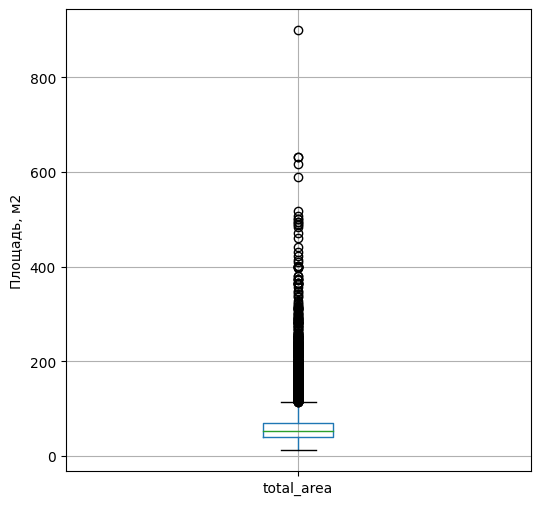

In [81]:
data.boxplot(column=['total_area'], figsize=(6,6), grid=True)
plt.ylabel('Площадь, м2')
plt.show()

Ящик с усами показывает, что все предложения с площадью более 100 м можно считать выбросами, так сильно они отличаются от основной массы данных. Посчитаем их количество и решим, можно ли удалить их:

In [82]:
data.loc[data['total_area'] > 100].count()

total_images            1836
last_price              1836
total_area              1836
first_day_exposition    1836
rooms                   1836
ceiling_height          1836
floors_total            1825
living_area             1655
floor                   1836
is_apartment            1836
studio                  1836
open_plan               1836
kitchen_area            1671
balcony                 1836
locality_name           1830
airports_nearest        1751
cityCenters_nearest     1759
parks_around3000        1836
parks_nearest           1117
ponds_around3000        1836
ponds_nearest           1113
days_exposition         1390
dtype: int64

Строк с такими значениями слишком много для их удаления без существенного ухудшения качества данных. Посчитаем количество строк с площадью более 200 м2: 

In [85]:
data.loc[data['total_area'] > 200].count()

total_images            227
last_price              227
total_area              227
first_day_exposition    227
rooms                   227
ceiling_height          227
floors_total            226
living_area             199
floor                   227
is_apartment            227
studio                  227
open_plan               227
kitchen_area            198
balcony                 227
locality_name           227
airports_nearest        220
cityCenters_nearest     223
parks_around3000        227
parks_nearest           148
ponds_around3000        227
ponds_nearest           159
days_exposition         175
dtype: int64

Получаем 227 предложений с площадью более 200 м2. Это элитная недвижимость, которая имеет свой отдельный рынок и свои параметры. Лучше не смешивать такие предложения с нормальной базой данных. Поэтому для дальнейшего анализа отбрасываем эти значения:

In [86]:
data = data.query('total_area < 200')

Делаем проверку результата:

In [87]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23467.000000,2.346700e+04,23467.000000,23467.000000,23467.000000,23382.000000,21593.000000,23467.000000,21219.000000,23467.000000,17933.000000,17953.000000,23467.000000,7928.000000,23467.000000,8947.000000,20338.000000
mean,9.833681,6.022777e+06,58.157148,2.034346,2.692798,10.716021,33.243781,5.902672,10.385018,0.593131,28821.971895,14280.397817,0.461627,492.009839,0.583841,519.969822,179.700610
std,5.667278,6.226958e+06,26.469020,0.995394,0.209556,6.605603,17.346053,4.894740,5.368435,0.960021,12677.591544,8592.991280,0.740236,343.060901,0.878636,277.579417,218.326679
min,0.000000,1.219000e+04,12.000000,0.000000,2.250000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18518.000000,9425.000000,0.000000,288.000000,0.000000,297.000000,45.000000
50%,9.000000,4.600000e+06,51.900000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26798.000000,13149.000000,0.000000,456.000000,0.000000,503.000000,95.000000
75%,14.000000,6.700000e+06,68.900000,3.000000,2.700000,16.000000,42.000000,8.000000,12.000000,1.000000,37351.000000,16333.000000,1.000000,613.000000,1.000000,732.000000,230.000000
max,50.000000,3.300000e+08,199.200000,11.000000,6.000000,60.000000,164.700000,33.000000,93.200000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Одновременно подкорректировались аномально высокие значения в столбцах last_price, living_area, kitchen_area, так как их можно считать производными от общей площади объекта.

### Расчет и добавление новых столбцов

Добавляем новый столбец - цена за кв метр;

In [88]:
data['price_for_metr'] = (data['last_price'] / data['total_area'])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000


Добавляем новый столбец - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [89]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day_of_week
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1


Добавляем новый столбец - месяц публикации объявления;

In [90]:
data['month'] = data['first_day_exposition'].dt.month   
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day_of_week,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6


Добавляем новый столбец - год публикации объявления;

In [91]:
data['year'] = data['first_day_exposition'].dt.year  
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day_of_week,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018


Добавляем новый столбец - тип этажа квартиры (значения — «‎первый», «последний», «другой»)

Выполняем проверку столбца 'floors_total' на пропуски:

In [92]:
data.loc[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day_of_week,month,year
186,12,11640000.0,65.20,2018-10-02,2,2.65,<NA>,30.80,4,False,False,False,12.00,0,Санкт-Петербург,39197.0,12373.0,1,123.0,0,NaN,49,178527.607362,1,10,2018
237,4,2438033.0,28.10,2016-11-23,1,2.65,<NA>,20.75,1,False,False,False,NaN,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,251,86762.740214,2,11,2016
457,4,9788348.0,70.80,2015-08-01,2,2.65,<NA>,38.40,12,False,False,False,10.63,0,Санкт-Петербург,37364.0,8322.0,2,309.0,2,706.0,727,138253.502825,5,8,2015
671,4,6051191.0,93.60,2017-04-06,3,2.65,<NA>,47.10,8,False,False,False,16.80,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,123,64649.476496,3,4,2017
1757,5,3600000.0,39.00,2017-04-22,1,2.65,<NA>,NaN,9,False,False,False,NaN,0,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,77,92307.692308,5,4,2017
1930,1,9750000.0,66.77,2016-05-13,2,2.65,<NA>,NaN,4,False,False,False,NaN,0,Санкт-Петербург,39886.0,10660.0,1,2276.0,3,244.0,90,146023.663322,4,5,2016
2392,7,5395770.0,53.00,2017-06-29,2,2.65,<NA>,29.00,22,False,False,False,9.00,0,Санкт-Петербург,43074.0,10820.0,0,NaN,0,NaN,48,101806.981132,3,6,2017
2846,4,2325000.0,27.80,2016-09-21,1,2.65,<NA>,19.40,15,False,False,False,NaN,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,307,83633.093525,2,9,2016
2952,10,6500000.0,54.30,2019-04-23,1,2.65,<NA>,22.20,6,False,False,False,12.30,0,Санкт-Петербург,23606.0,3148.0,0,NaN,0,NaN,<NA>,119705.340700,1,4,2019
3031,9,6400000.0,56.70,2018-03-27,2,2.65,<NA>,32.00,12,False,False,False,12.00,0,Кудрово,NaN,NaN,0,NaN,0,NaN,231,112874.779541,1,3,2018


In [93]:
data['floors_total'].isna().sum()

85

Обнаружили пропуски в 85 строках, что составляет менее процента от всего датафрейма. Поэтому для корректной работы функции можно удалить эти строки:

In [94]:
data = data.dropna(subset=['floors_total'])

In [95]:
data['floors_total'].isna().sum()

0

Для разбивки типа этажей по категориям напишем функцию:

In [96]:
def categorize_floor(data):

    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] < data['floors_total']:
        return 'другой'
    elif data['floor'] == data['floors_total'] :
        return 'последний'
    else:
        return 'не найдено'
    
data['type_of_floor'] = data.apply(categorize_floor, axis=1)  
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day_of_week,month,year,type_of_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой


Добавляем новый столбец - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [97]:
data['km_to_center'] = (data['cityCenters_nearest'] / 1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day_of_week,month,year,type_of_floor,km_to_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой,8.0


## Исследовательский анализ данных

### Изучение параметров объектов

#### Изучим параметр общей площади:

<Axes: >

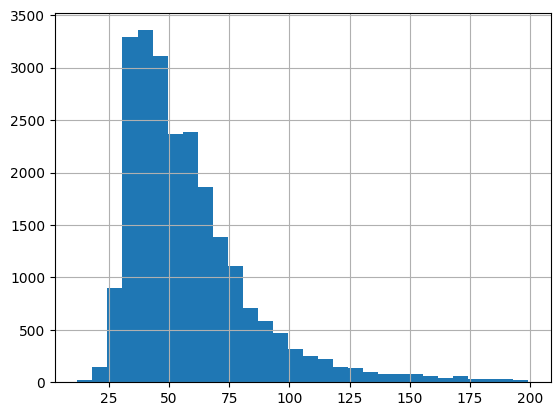

In [100]:
data['total_area'].hist(bins=30)

Основной объем выставленных на продажу квартир находится в диапазоне общей площади 40-60 м2

#### Изучим параметр жилой площади:

<Axes: >

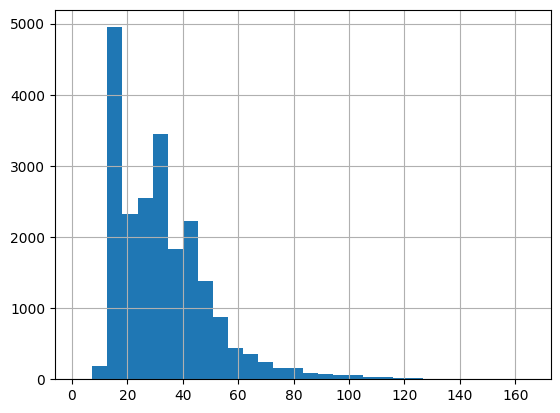

In [101]:
data['living_area'].hist(bins=30)

Основной объем выставленных на продажу квартир находится в диапазоне жилой площади до 50 м2.

#### Изучим параметр площади кухни:

<Axes: >

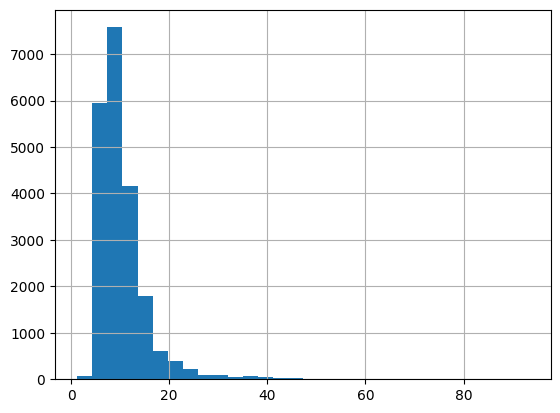

In [102]:
data['kitchen_area'].hist(bins=30)

Площадь кухни основного объема выставленных на продажу квартир находится в диапазоне до 20 м2

#### Изучим параметр цены объекта:

<Axes: >

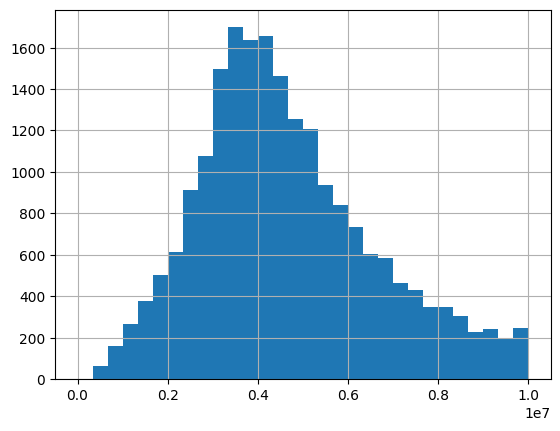

In [103]:
data['last_price'].hist(bins=30, range=(0,10000000))

Больше всего выставлено на продажу квартир в ценовом диапазоне от 2 до 8 миллионов рублей, максимальное количество - по цене 4 миллиона рублей. Минимальная цена около 500 тыс рублей.

#### Изучим параметр количества комнат:

<Axes: >

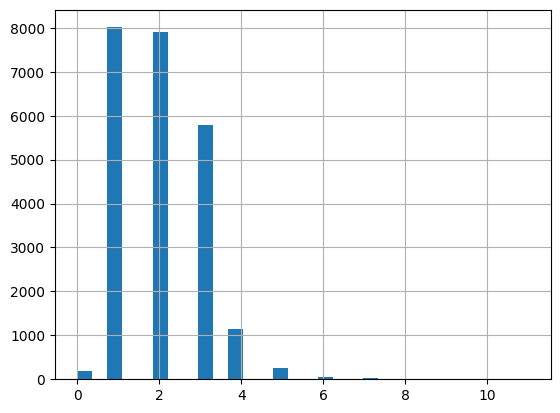

In [104]:
data['rooms'].hist(bins=30)

Больше всего в базе однокомнатных и двухкомнатных квартир, чуть меньше трехкомнатных. 4-х комнатных меньше в разы,\
а 5-ти, 6-ти и 7-ми комнатных меньше на порядок. 8-ми и больше комнатные квартиры практически не представлены.

#### Изучим параметр высоты потолков:

<Axes: >

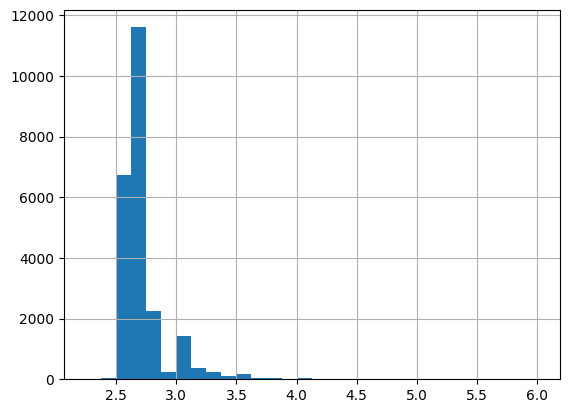

In [105]:
data['ceiling_height'].hist(bins=30)

Больше всего в базе представлено квартир с высотой потолков 2,5 - 2,75 м, квартир с высокими потолками - от 3 до 3,75 м было выставлено гораздо меньше, выше 4 м - единичные предложения.

#### Изучим параметр этажа квартиры:

<Axes: >

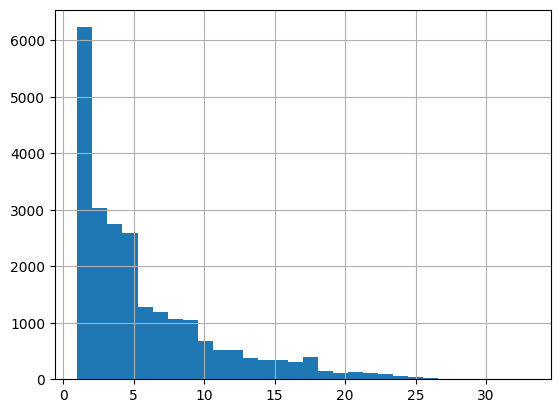

In [106]:
data['floor'].hist(bins=30)

Основное предложение квартир в базе приходится на дома этажностью от 1 до 5 этажей.
Достаточно много квартир в домах 6-17 этажей, в домах этажностью 17-27 самое немногочисленное предложение. Выше 27 этажей - единичные предложения.



#### Изучим параметр типа этажа квартиры:

<Axes: >

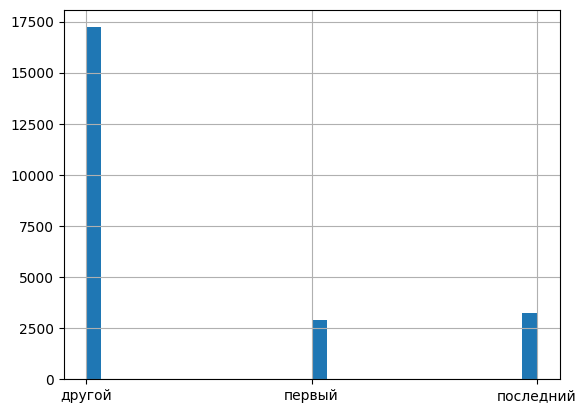

In [107]:
data['type_of_floor'].hist(bins=30)

Предложений на первом и последнем этажах значительно меньше, чем на всех прочих.

#### Изучим параметр общего количества этажей в доме:

<Axes: >

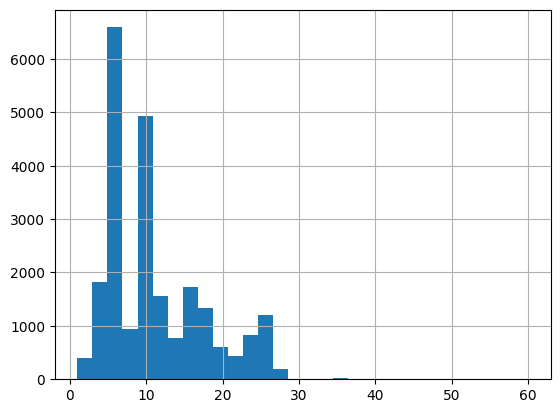

In [108]:
data['floors_total'].hist(bins=30)

В базе данных представлены квартиры в зданиях этажности от 1 до 35.
Больше всего предложений в зданиях 5-ти и 10-ти этажных зданиях.








#### Изучим параметр расстояния до центра города в метрах:


<Axes: >

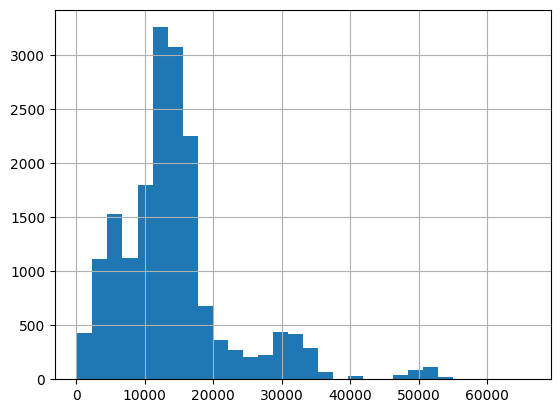

In [109]:
data['cityCenters_nearest'].hist(bins=30)

В базе данных представлены квартиры, расположенные на расстоянии от 0 до 65 км до центра города. Основное предложение в районе 15 км от центра.

#### Изучим параметр расстояния до ближайшего аэропорта: 

<Axes: >

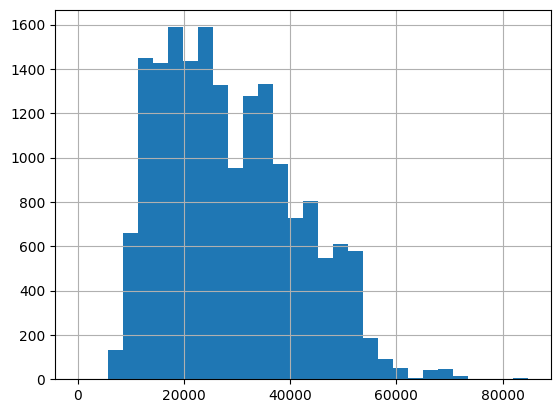

In [110]:
data['airports_nearest'].hist(bins=30)

Основное предложение квартир в районе от 10 км до 50 от аэропорта.

#### Изучим параметр дня и месяца публикации объявления:

<Axes: >

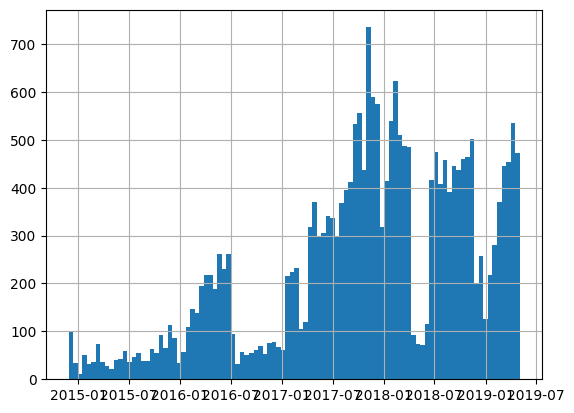

In [111]:
data['first_day_exposition'].hist(bins=100)
                                

Квартиры, представленные в базе данных, выставлены на продажу в интервале от 2015 до 2019 года, причем максимум был в 2019 году.



### Изучим как быстро продавались квартиры:

Строим гистограмму с распределением по количеству дней экспозиции квартиры:

<Axes: >

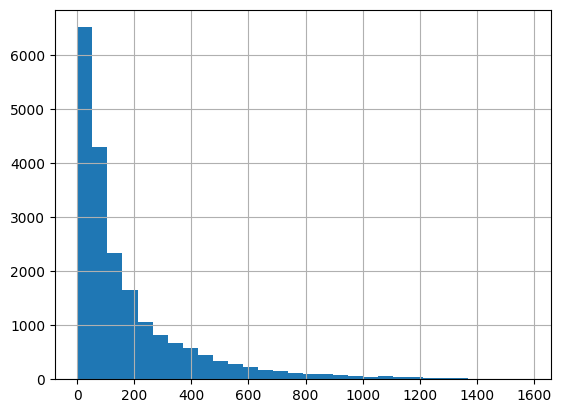

In [112]:
data['days_exposition'].hist(bins=30)

Считаем среднее арифметическое значение:

In [113]:
data['days_exposition'].mean()

179.69603198104826

В среднем в этой базе данных квартиры продавались за 180 дней 

Считаем медиану:

In [114]:
data['days_exposition'].median()

95.0

Медиана имеет значение 95 дней 

Чтобы определить, какие продажи можно считать быстрыми, а какие — необычно долгими, построим диаграмму размаха:

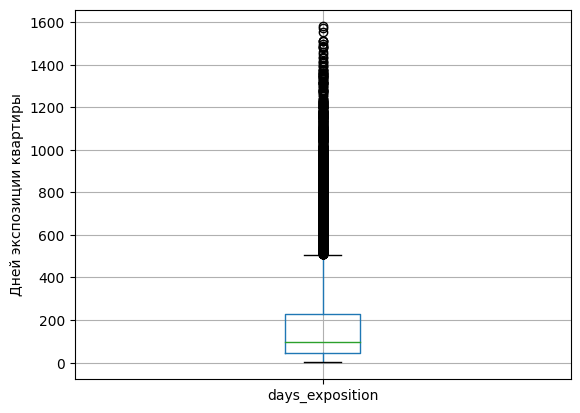

In [115]:
data.boxplot('days_exposition')
plt.ylabel('Дней экспозиции квартиры')
plt.show()

Исходя из графика, продажу можно считать быстрой при сроке экспозиции менее 3 месяцев (медиана). 
А при сроке экспозиции 7 месяцев и более продажа считается долгой.

### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта?

#### Изучим зависимость цены от общей площади

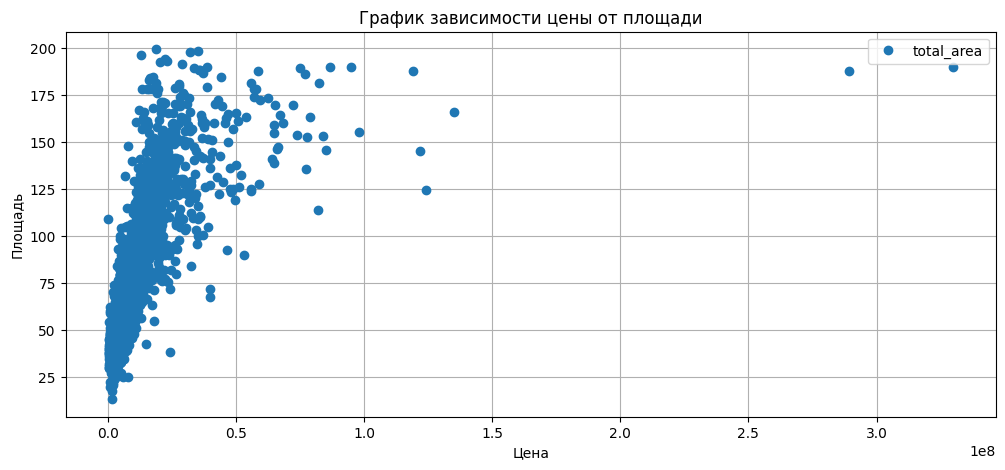

In [116]:
(data
    
     .pivot_table(index='last_price', values=['total_area'])
     .plot(style='o',grid=True, figsize=(12, 5), title='График зависимости цены от площади')
)
plt.xlabel('Цена')
plt.ylabel('Площадь')
plt.show()

In [117]:
data['total_area'].corr(data['last_price'])

0.6586792559738938

На графике наблюдается прямая зависимость цены квартиры от ее площади, что вполне логично. Коэффицент корреляции Пирсона равен 0.659, что говорит о достаточно высокой корреляции между площадью и ценой.

#### Изучим зависимость цены от жилой площади

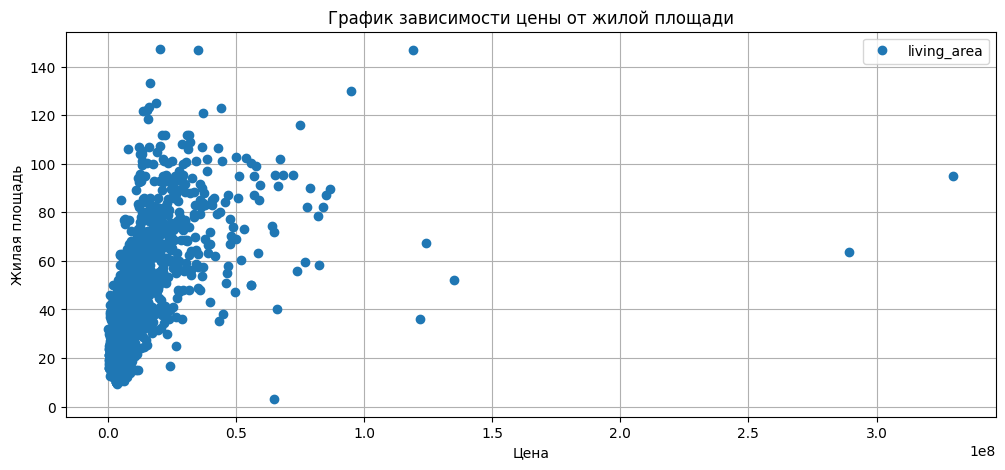

In [118]:
(data
     .pivot_table(index='last_price', values=['living_area'])
     .plot(style='o',grid=True, figsize=(12, 5), title='График зависимости цены от жилой площади')
)
plt.xlabel('Цена')
plt.ylabel('Жилая площадь')
plt.show()

In [119]:
data['living_area'].corr(data['last_price'])

0.5410746982897082

График показывает, что чем больше жилая площадь, тем выше цена квартиры. Коэффицент корреляции Пирсона равен 0.541, что говорит о достаточно высокой корреляции между жилой площадью и ценой.

#### Изучим зависимость цены от площади кухни

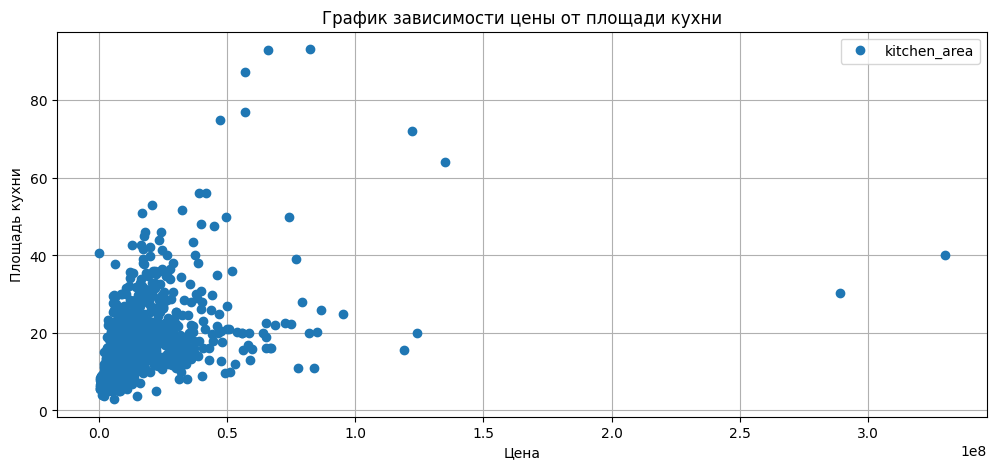

In [120]:
(data
    
     .pivot_table(index='last_price', values=['kitchen_area'])
     .plot(style='o', grid=True, figsize=(12, 5), title='График зависимости цены от площади кухни')
)
plt.xlabel('Цена')
plt.ylabel('Площадь кухни')
plt.show()

In [121]:
data['kitchen_area'].corr(data['last_price'])

0.5186435272773581

График показывает, что чем больше площадь кухни, тем выше цена квартиры. Коэффицент Пирсона равен 0.518, что говорит о достаточно высокой корреляции между площадью и ценой.

#### Изучим зависимость цены от количества комнат

In [122]:
data.pivot_table(index='rooms', values=['last_price'])

,last_price
rooms,
0,2.993946e+06
1,3.830550e+06
2,5.588244e+06
3,8.040897e+06
4,1.179107e+07
5,1.507834e+07
6,1.658603e+07
7,1.868200e+07
8,1.914500e+07


<Axes: title={'center': 'График зависимости цены от числа комнат'}, xlabel='rooms'>

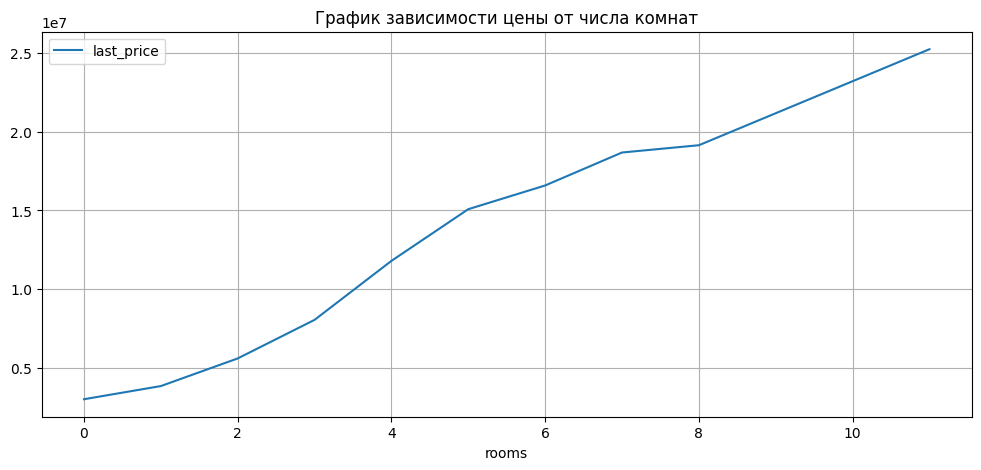

In [123]:
data.pivot_table(index='rooms', values=['last_price']).plot(grid=True, figsize=(12, 5), title='График зависимости цены от числа комнат')

In [124]:
data['rooms'].corr(data['last_price'])

0.37915145264480005

Пиковое значение цены для 8 комнат вероятнее всего объясняется случайными факторами.  Коэффициэнт корреляции составляет 0,379, что говорит о том, что взаимосвязь параметров нечеткая.

,mean,median
rooms,,
11,132639.736685,132639.736685
8,111694.909344,111694.909344
7,119583.061090,110238.441937
0,108075.183034,105098.039216
1,100796.933715,100000.000000
6,107447.823962,94067.796610
2,95458.758128,92777.777778
4,105983.730471,92114.445220
5,106094.755272,91538.461538


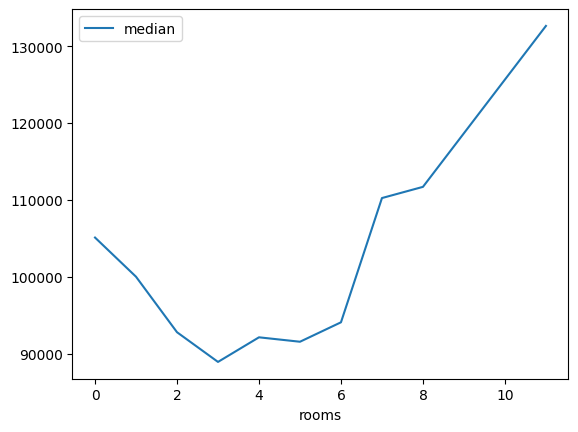

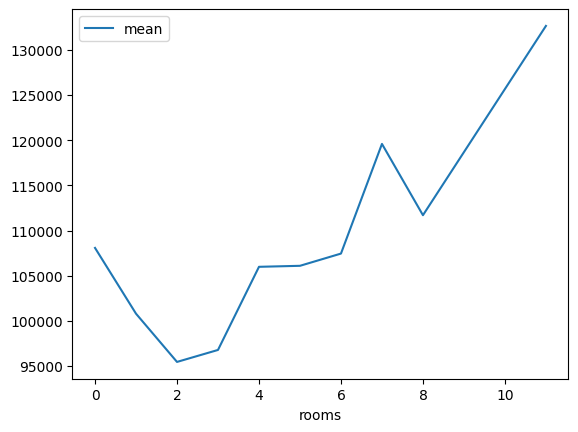

In [125]:
pivot_table = data.pivot_table(
    index = 'rooms', values = 'price_for_metr', aggfunc = ['mean', 'median'])
pivot_table.columns = ['mean', 'median']

display(pivot_table.sort_values('median', ascending = False))
pivot_table.plot(y = 'median');
pivot_table.plot(y = 'mean');

Явной зависимости средней цены или медианного значения цены от количества комнат не наблюдается.

#### Изучим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

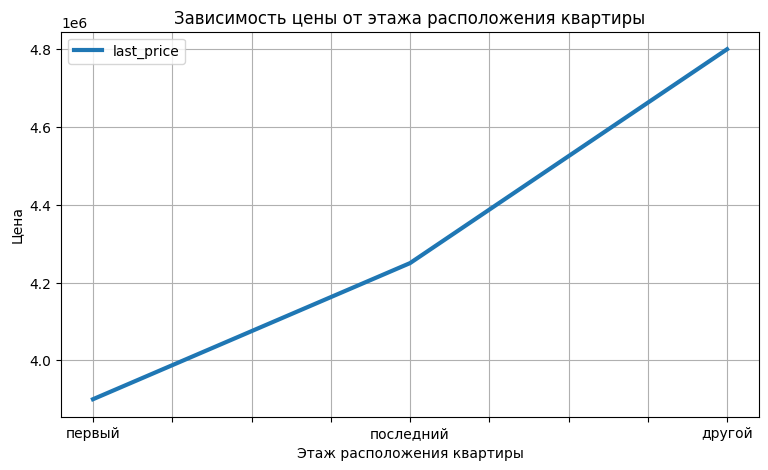

In [126]:
(data
     .pivot_table(index='type_of_floor', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=3, title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

График показывает, что квартиры на первом этаже образуют самый низкий ценовой сегмент. Квартиры на последних этажах выше по цене, чем квартиры на первых этажах, но ниже, чем квартиры на всех прочих этажах.

#### Изучим зависимость цены от даты размещения (день недели, месяц, год)

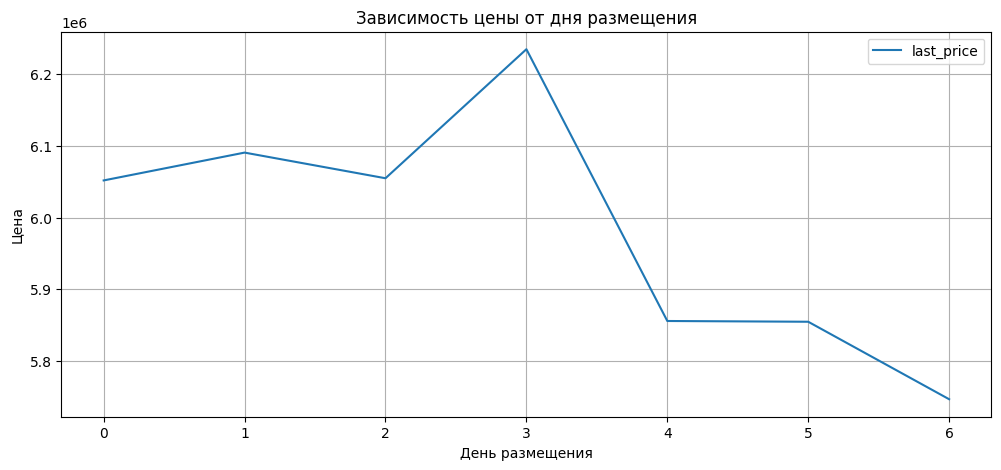

In [127]:
(data
     .pivot_table(index='day_of_week', values=['last_price'])
     .plot(grid=True, figsize=(12, 5),title='Зависимость цены от дня размещения')
)
plt.xlabel('День размещения')
plt.ylabel('Цена')

plt.show()

На графике мы видим провал, который приходится на воскресенье. Скорее всего это связано с традиционным снижением деловой активности в этот день.

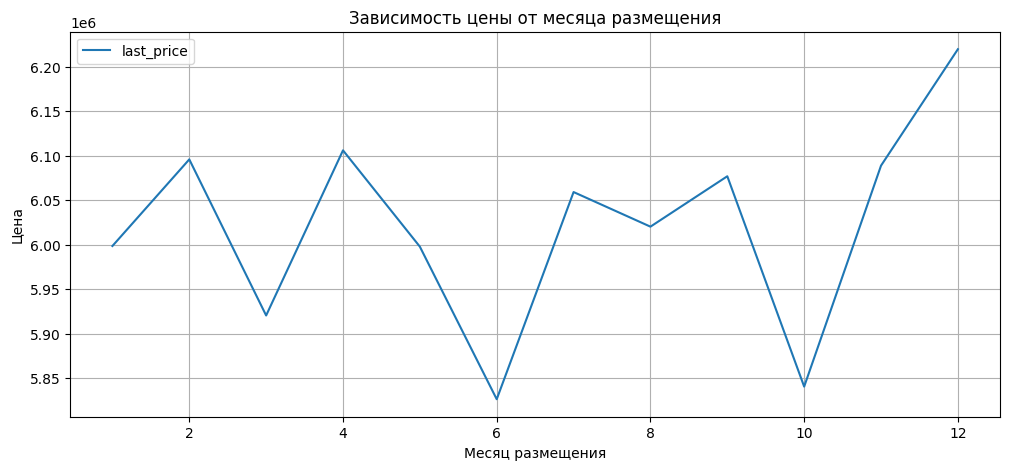

In [128]:
(data
     .pivot_table(index='month', values=['last_price'])
     .plot(grid=True, figsize=(12, 5),title='Зависимость цены от месяца размещения')
)
plt.xlabel('Месяц размещения')
plt.ylabel('Цена')

plt.show()

Четкой зависимости от месяца размещения на графике не наблюдается. Единственный момент, на который стоит обратить внимание - пик в декабре. Что объясняется традиционным подъемом покупательской активности в конце года.

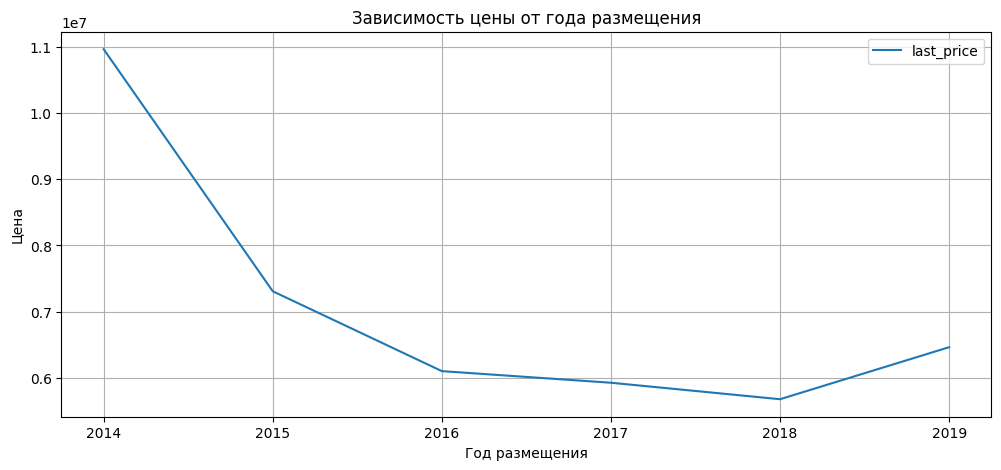

In [129]:
(data
     .pivot_table(index='year', values=['last_price'])
     .plot(grid=True, figsize=(12, 5),title='Зависимость цены от года размещения')
)
plt.xlabel('Год размещения')
plt.ylabel('Цена')

plt.show()

График цен с распределением по годам четко показывает падение цен начиная с 2014 года и вплоть до 2018 года,когда произошел разворот и с 2018 до 2019 начался рост цен.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [130]:
data_top_10 = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
data_top_10.columns=['ads_total']
data_top_10

,ads_total
locality_name,
Санкт-Петербург,15436
Мурино,552
Шушары,439
Всеволожск,398
Пушкин,364
Колпино,337
Парголово,326
Гатчина,307
Кудрово,299


Посчитаем среднюю цену за метр квадратный в выбранных населенных пунктах:

In [131]:
data_top_10['price_for_metr'] = data.pivot_table(index='locality_name', values='price_for_metr', aggfunc='mean')
data_top_10_medium_price=data_top_10.style.format({'price_for_metr':'{:.2f} руб'})

In [132]:
data_top_10_medium_price

,ads_total,price_for_metr
locality_name,,
Санкт-Петербург,15436,113562.97 руб
Мурино,552,85629.57 руб
Шушары,439,78551.34 руб
Всеволожск,398,68654.47 руб
Пушкин,364,103122.54 руб
Колпино,337,75333.30 руб
Парголово,326,90332.26 руб
Гатчина,307,68746.15 руб
Кудрово,299,92473.55 руб


Самые высокие цены в Санкт-Петербурге, следующий населенный пункт - Пушкин, третий в рейтинге - Кудрово. Замыкает рейтинг Выборг, в котором средняя цена за метр ниже чем в Санкт-Петербурге почти в два раза.

### Проверим, как стоимость объектов зависит от расстояния до центра города.

Выделим квартиры в Санкт-Петербурге:

In [133]:
data_spb = data.loc[data['locality_name'] == 'Санкт-Петербург']

In [134]:
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day_of_week,month,year,type_of_floor,km_to_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.370370,3,3,2019,другой,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,NaN,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,<NA>,110544.692737,3,4,2019,другой,12.0


Посчитаем среднюю цену для каждого километра удаления от центра города:

In [135]:
price_for_km = data_spb['last_price'].sum()/data_spb['km_to_center'].sum()
price_for_km

629434.0438086848

Средняя цена для каждого километра составляет 629434 ₽

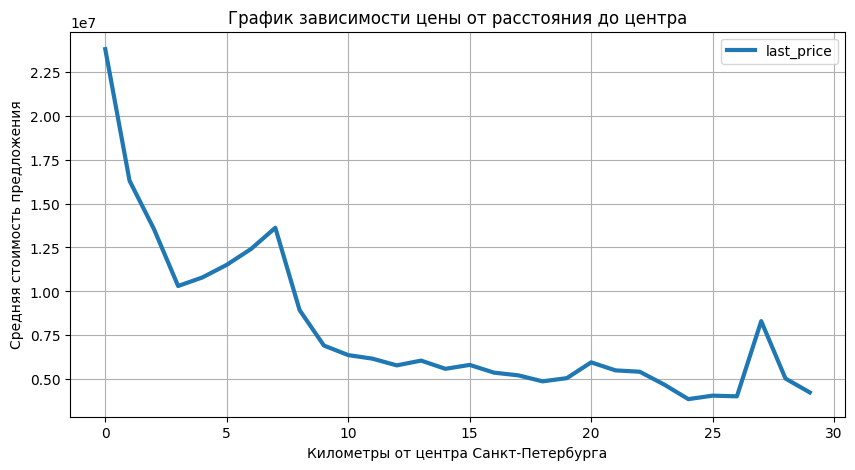

In [136]:
data_spb.pivot_table(index='km_to_center', values='last_price', aggfunc='mean').plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от расстояния до центра')
plt.xlabel('Километры от центра Санкт-Петербурга')
plt.ylabel('Средняя стоимость предложения')
plt.show()

График подтверждает, что стоимость квартир сильно зависит от расстояния до центра города. 
При этом после достижения отметки 9 км эта зависимость сильно снижается и становится не такой явной. 
То есть особую ценность имеют квартиры именно в историческом центре города.

## Общий вывод

Проведено исследование базы данных объявлений опродажах квартир.

Была проделана следующаяя работа:
- получена первоначальная информация по датасету
- предварительно изучена информация по датасету
- обнаружены пропуски, неявные дубликаты и аномалии

Была проведена работа по заполнению пропусков, удаление ненужных строк из датасета. Аномалии и дубликаты обработаны.

Добавлены новые показатели: 
- цена одного квадратного метра 
- день, месяц и год публикации объявления 
- категория этажа
- расстояние в км до центра города

Изучены и описаны с построением гистограмм следующие параметры:
- общая площадь
- жилая площадь
- площадь кухни
- цена объекта
- количество комнат
- высота потолков
- этаж квартиры
- тип этажа квартиры («первый», «последний», «другой»)
- общее количество этажей в доме
- расстояние до центра города в метрах
- расстояние до ближайшего аэропорта
- расстояние до ближайшего парка
- день и месяц публикации объявления

Изучено, как быстро продавались квартиры. Построена гистограмма, посчитаны среднее значение и медиана. Сделано предположение, что быстрые продажи проходят за время в интервале от 1 до 50 дней, от 50 до 150 дней это обычный срок продажи квартиры, а если срок экспозиции больше 200 дней, то продажу можно назвать долгой. Для получения более точных ответов по срокам быстрых продаж желательно получить дополнительные данные, продана ли квартира или объявление еще активно.

Изучено, какие факторы больше всего влияют на общую стоимость объекта.
- общей площади
- жилой площади
- площади кухни
- количество комнат
- типа этажа, на котором расположена квартира (первый, последний, другой)
- даты размещения (день недели, месяц, год)

Выбраны топ 10 населенных пунктов с самым большим количеством объявлений, для них посчитаны средние цены. Самые высокие цены в Санкт-Петербурге, следующий населенный пункт - Пушкин, третий в рейтинге - Кудрово. Замыкает рейтинг Выборг, в котором средняя цена за метр ниже чем в Санкт-Петербурге почти в два раза.

Для Санкт-Петербурга сделали исследование зависимости цены квартиры в зависимости от расстояния до центра города. Определили,что в радиусе 9 км эта зависимость очень сильная, но после достижения отметки 9 км она сильно снижается и становится не такой явной. То есть особую ценность имеют квартиры именно в историческом центре города.

В целом данные показывают, что падение на рынке недвижимости, которое продолжалось с 2015 до 2018 года, закончилось, и с 2018 года рынок перешел в стадию роста.

## Рекомендации для сервиса

- Такие параметры жилая площадь (living_area) и площадь кухни (kitchen_area) следует сделать обязательными при публикации объявления. При этом стоит учитывать, что для апартаментов жилая площадь является условным, показателем, а в квартирах-студиях не выделяется в отдельную площадь кухни.
- Для параметра высота потолков (ceiling_height) необходимо добавить ограничения при вводе данных (минимальная высота потолка в старом фонде - 2,0 м, максимальная - у двухуровневых квартир и может достигать 7 м).
- Для параметра цена объекта (last_price) рекомендуется ввести информирование пользователя о необычных значениях, а диапазон установить на основании стоимости за квадратный метр. Продавцу такая настройка сообщит об ошибке и поможет разместить объявление с верной информацией.
- Добавить информацию о том, что объект недвижимости относится к апартаментам.
- Выбор населенного пункта - переменная (licality_name), необходимо ограничить списком.